<a href="https://colab.research.google.com/github/Preksha-D/Synapse_LP/blob/week3/Synapse_LP_Task_3_Preksha_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3**

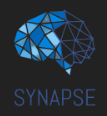

**Unsupervised Learning**

Unsupervised learning can be broken down into three main tasks:

1.   Clustering
2.   Association rules
3.   Dimensionality reduction

Let's explore these topics :))  

Clustering is an unsupervised learning technique used to group similar data points together. It's widely used in various applications like customer segmentation, anomaly detection, and more. In this task, we'll explore different clustering algorithms and visualize their results.

We will work with the Country dataset. This dataset consists of information that determine the socio-economic factors of a country - exports, imports, income, life expectancy, gdpp, etc. The main aim of this task is to find the countries which are in dire need of financial aid.

The dataset that will be used can be found here - [DATA](https://drive.google.com/drive/folders/1FMMMeniP32-G5j_s15S89z7LDlB1Xe9j?usp=drive_link)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from ipywidgets import interact
import os
import warnings
warnings.filterwarnings("ignore")

Mount your drive

In [3]:
# code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the data
data = '/content/drive/MyDrive/Country-data.csv'  # Mention the path in the strings below
df = pd.read_csv(data)

# Understanding the data

In [5]:
# print 1st few rows of the dataset, its shape and the columns
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
# check for any duplicated values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
162,False
163,False
164,False
165,False


<Axes: >

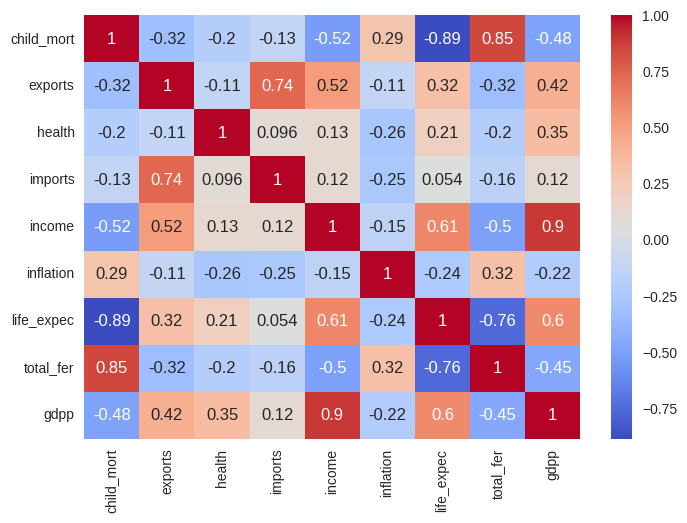

In [9]:
# displaying the correlation matrix (heatmap)
sns.heatmap(df.drop(['country'], axis = 1).corr(), cmap = 'coolwarm', annot = True)

Something really cool you can use to plot data other than Seaborn, Matplotlib, etc. is **Plotly**. Using this we can display how any feature here (import, gdpp or any of the others) varies country-wise.
And this can literally be plotted on the world map!

The official documentation- [Choropleth Maps](https://plotly.com/python/choropleth-maps/)

In [10]:
countries_map = list(df.drop('country', axis = 1))
countries_map

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [11]:
# explain what all the parameters mean here
for column in countries_map:
    fig = px.choropleth(df,      #get dif map for each column
                       geojson = countries_map,      #we pass our list of countries to a geojson file
                       locationmode = 'country names',    #uses passed list as country names
                       locations = 'country',        #used tolabel when we hover
                       color = column,              #coloured based on column data
                       title = 'Country by ' + column,    #title of the map
                       color_continuous_scale = 'Greens')    #the colour gradient to be used

    fig.show()

# Pre-processing the data

In [12]:
# Dropping the 'country' column for PCA and clustering
df = df.drop({'country'}, axis = 1)

Stnadardize the data

In [13]:
# Initiate a StandardScaler object and fit it on the numeric columns
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)
df_std

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# Dimensionality Reduction using PCA - Principal Component Analysis

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Theory: https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643 and https://rlrocha.medium.com/choosing-the-number-of-components-of-principal-component-analysis-36902a887520

Theory + Implementation.: https://youtu.be/OFyyWcw2cyM (Jump to timestamp - 13:50 for PCA implementaion)

Before we start of with this, **explain what PCA is and why is it necessary?**

Answer:

So, it is form of unsupervised learning. We find how much the data tends to vary, relavtive to each other. then we use this knowledge to try to make the data set smaller (reduce its dimensions) without losing any of this variance we found to ensure the coloumns are equally as interedependant in the new data set as they were in the og one. for this we use concepts like eigen values, eigen vectors and SVD (which they never told the implemtation of in math class when they taught it). For this we make sure our data is only numbers and no labels.
It is better in ml to have less dimensions for more accuracy

Reduce the number of dimensions using PCA,

Hints:
1. Initialise instance of PCA and set *n_components* to 0.9 and *random_state* to 20.
2. Fit data_scaled over the PCA instance created
3. Transform data_scaled over the fitted PCA instance and store it in a variable named data_pca.

In [14]:
# code here
pca = PCA(n_components = 0.9)
pca.fit(df_std)
data_pca = pca.transform(df_std)

Let's check the shape of data_pca

In [15]:
# code here
# Should print (167, 5) if everything is correct.
data_pca.shape

(167, 5)

Go through these and display the explained_variance_ratio_ and plot the same

Ref: https://saturncloud.io/blog/what-is-sklearn-pca-explained-variance-and-explained-variance-ratio-difference/ and https://www.jcchouinard.com/pca-explained-variance/

In [16]:
# explained variance
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance)
print(explained_variance_ratio)

[4.16057017 1.55566165 1.1774338  1.00077724 0.66459866]
[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211]


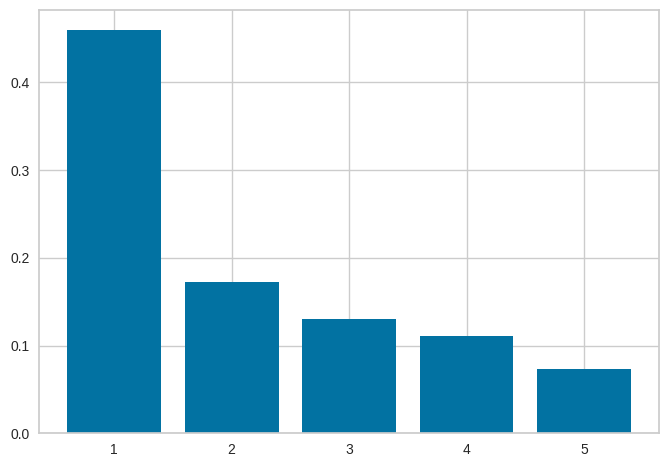

In [17]:
# Plotting the explained variance
plt.bar(x=np.arange(1, len(explained_variance_ratio) + 1), height = explained_variance_ratio)
plt.show()

What do you understand from this?

Answer:

It shows that the variance in the 1st element is the highest >0.4, and as we move to the other components that variance decreases, thus the most imp in terms of og dataset

# K-Means Clustering (Partition-Based Clustering)

K-means clustering is an essential partitioning algorithm used to categorize a dataset into 'k' distinct, non-overlapping clusters. Each data point is assigned to the cluster with the nearest mean or centroid, symbolizing the cluster's center. The primary goal of the algorithm is to minimize the sum of squared distances between data points and their respective cluster centroids.

For an in-depth exploration of K-means clustering, you can refer to this comprehensive article on Analytics Vidhya: [Comprehensive Guide to K-means Clustering](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/).

For a deeper understanding of the mathematical underpinnings of K-means clustering, Wikipedia is a valuable resource. You can explore the Wikipedia page on K-means clustering for a detailed description: [K-means Clustering Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering). This will help you grasp the mathematical intricacies of the algorithm and its applications in machine learning.

**2 Dimensional Visualization**

In [18]:
## Perform K-Means clustering with interactive widget - give it a second to load, when you change the no. of clusters
def kmeans_clustering(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_pca)

    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

low = 1
high = 5
scale = 1
interact(kmeans_clustering, num_clusters=(low, high, scale))

interactive(children=(IntSlider(value=3, description='num_clusters', max=5, min=1), Output()), _dom_classes=('…

<function __main__.kmeans_clustering(num_clusters)>

**3 Dimensional Visualization**

In [19]:
def kmeans_3d_clustering(num_clusters):
    kmeans_3d = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_3d_labels = kmeans_3d.fit_predict(data_pca)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=kmeans_3d_labels, cmap='viridis', edgecolors='k')
    ax.set_xlabel('Feature 1 (Standardized)')
    ax.set_ylabel('Feature 2 (Standardized)')
    ax.set_zlabel('Feature 3 (Standardized)')
    ax.set_title('Kmeans Clustering (3D)')
    plt.show()

interact(kmeans_3d_clustering, num_clusters=(1, 6, 1))

interactive(children=(IntSlider(value=3, description='num_clusters', max=6, min=1), Output()), _dom_classes=('…

<function __main__.kmeans_3d_clustering(num_clusters)>

# Elbow Point

The "elbow point" is a concept often used in the context of K-means clustering to help determine the optimal number of clusters (k) for a given dataset. It is a graphical method that can assist data analysts and machine learning practitioners in finding an appropriate value for k when applying K-means clustering.

The rationale behind the elbow point method is that as you increase the number of clusters (k), the sum of squared distances will generally decrease because data points will be closer to their respective cluster centroids. However, beyond a certain point, subdividing the data into more clusters doesn't provide significant improvements in reducing the sum of squared distances. The elbow point represents that optimal trade-off between the number of clusters and the compactness of each cluster.

It's important to note that the elbow point method is a heuristic and not a foolproof method for determining the ideal k value. In some cases, the elbow point may not be very pronounced, making it challenging to choose the best k. Additionally, the choice of k should also consider domain knowledge and the specific goals of your analysis.


Elbow Method to determine the number of clusters to be formed:


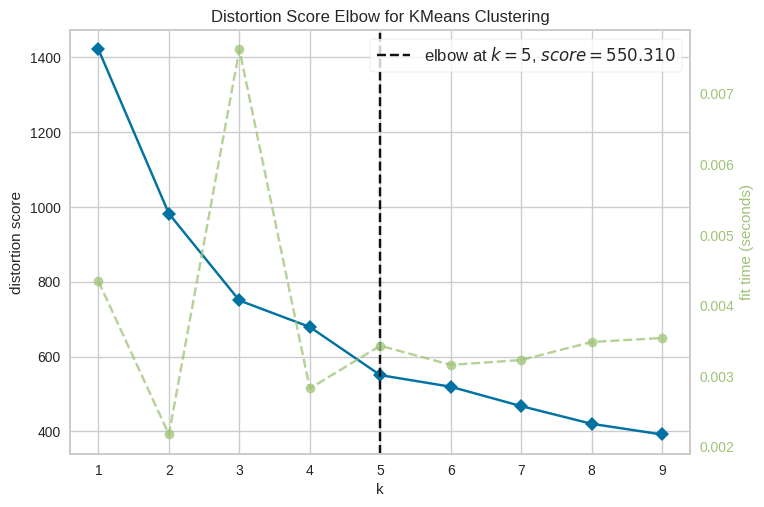

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(KMeans(), k=(1, 10))
Elbow_M.fit(data_pca)
Elbow_M.show()

# Agglomerative Clustering

It is a hierarchical clustering algorithm used in unsupervised machine learning and data analysis. It is a "bottom-up" or "agglomerative" approach to clustering, where individual data points are initially treated as their own clusters and then progressively merged into larger clusters based on a similarity or distance metric. The result is a tree-like structure called a dendrogram that represents the hierarchical relationships between clusters.

As always, You can find more detailed information about hierarchical clustering, including agglomerative clustering, in the Wikipedia article on "Hierarchical clustering" at the following link: [Hierarchical Clustering Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering). This is the best resource for hierarchical clustering and it is advisable to go through it twice if possible! :)

More ref: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

**2 Dimensional Visualization**

In [22]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_clustering(num_clusters):
  agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
  agglomerative_labels = agglomerative.fit_predict(data_pca)# write the code

  # write code for plotting
  plt.figure(figsize=(8, 6))
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agglomerative_labels, cmap='viridis', edgecolors='k')
  plt.show()


interact(agglomerative_clustering, num_clusters=(0,9 , 1))  # here as well

interactive(children=(IntSlider(value=4, description='num_clusters', max=9), Output()), _dom_classes=('widget-…

<function __main__.agglomerative_clustering(num_clusters)>

Similar to classification and regression metrics, we have some [clustering metrics](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) to evaluate performance.

We wll explore one of them: [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [23]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agglo.fit_predict(df_std)
silhouette = silhouette_score(df_std, labels)
silhouette

0.5620472870560562

Look into any 2 other metrics and give a brief explanation.

Do that here :)

1) davies_bouldin_score: it is the how similar a cluster is to its most similar cluster. it is the ratio between intra-cluster distnace i.e. distance of points in the same cluster to the inter-cluster distance i.e distance between the clusters. Lower the score, the more similar they are

2) adjusted_rand_score: rand index is a also used to check similarity between 2 clusters of the same data produced by diff algos. but it doesn't consider chance thus we use adjusted rand. So this method is used to check how the 2 diff clustering agree while accounting for any similarities by chance

**3 Dimensional Visualization**

In [35]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_3d_clustering(num_clusters):
    agglomerative_3d = AgglomerativeClustering(n_clusters=num_clusters)
    agglomerative_3d_labels = agglomerative_3d.fit_predict(data_pca) # write code here

    # plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agglomerative_3d_labels, cmap='viridis', edgecolors='k')
    plt.show()

interact(agglomerative_3d_clustering, num_clusters=( 0, 9,1 )) # fill here

interactive(children=(IntSlider(value=4, description='num_clusters', max=9), Output()), _dom_classes=('widget-…

<function __main__.agglomerative_3d_clustering(num_clusters)>

Look into what dendrograms are and plot them here.

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

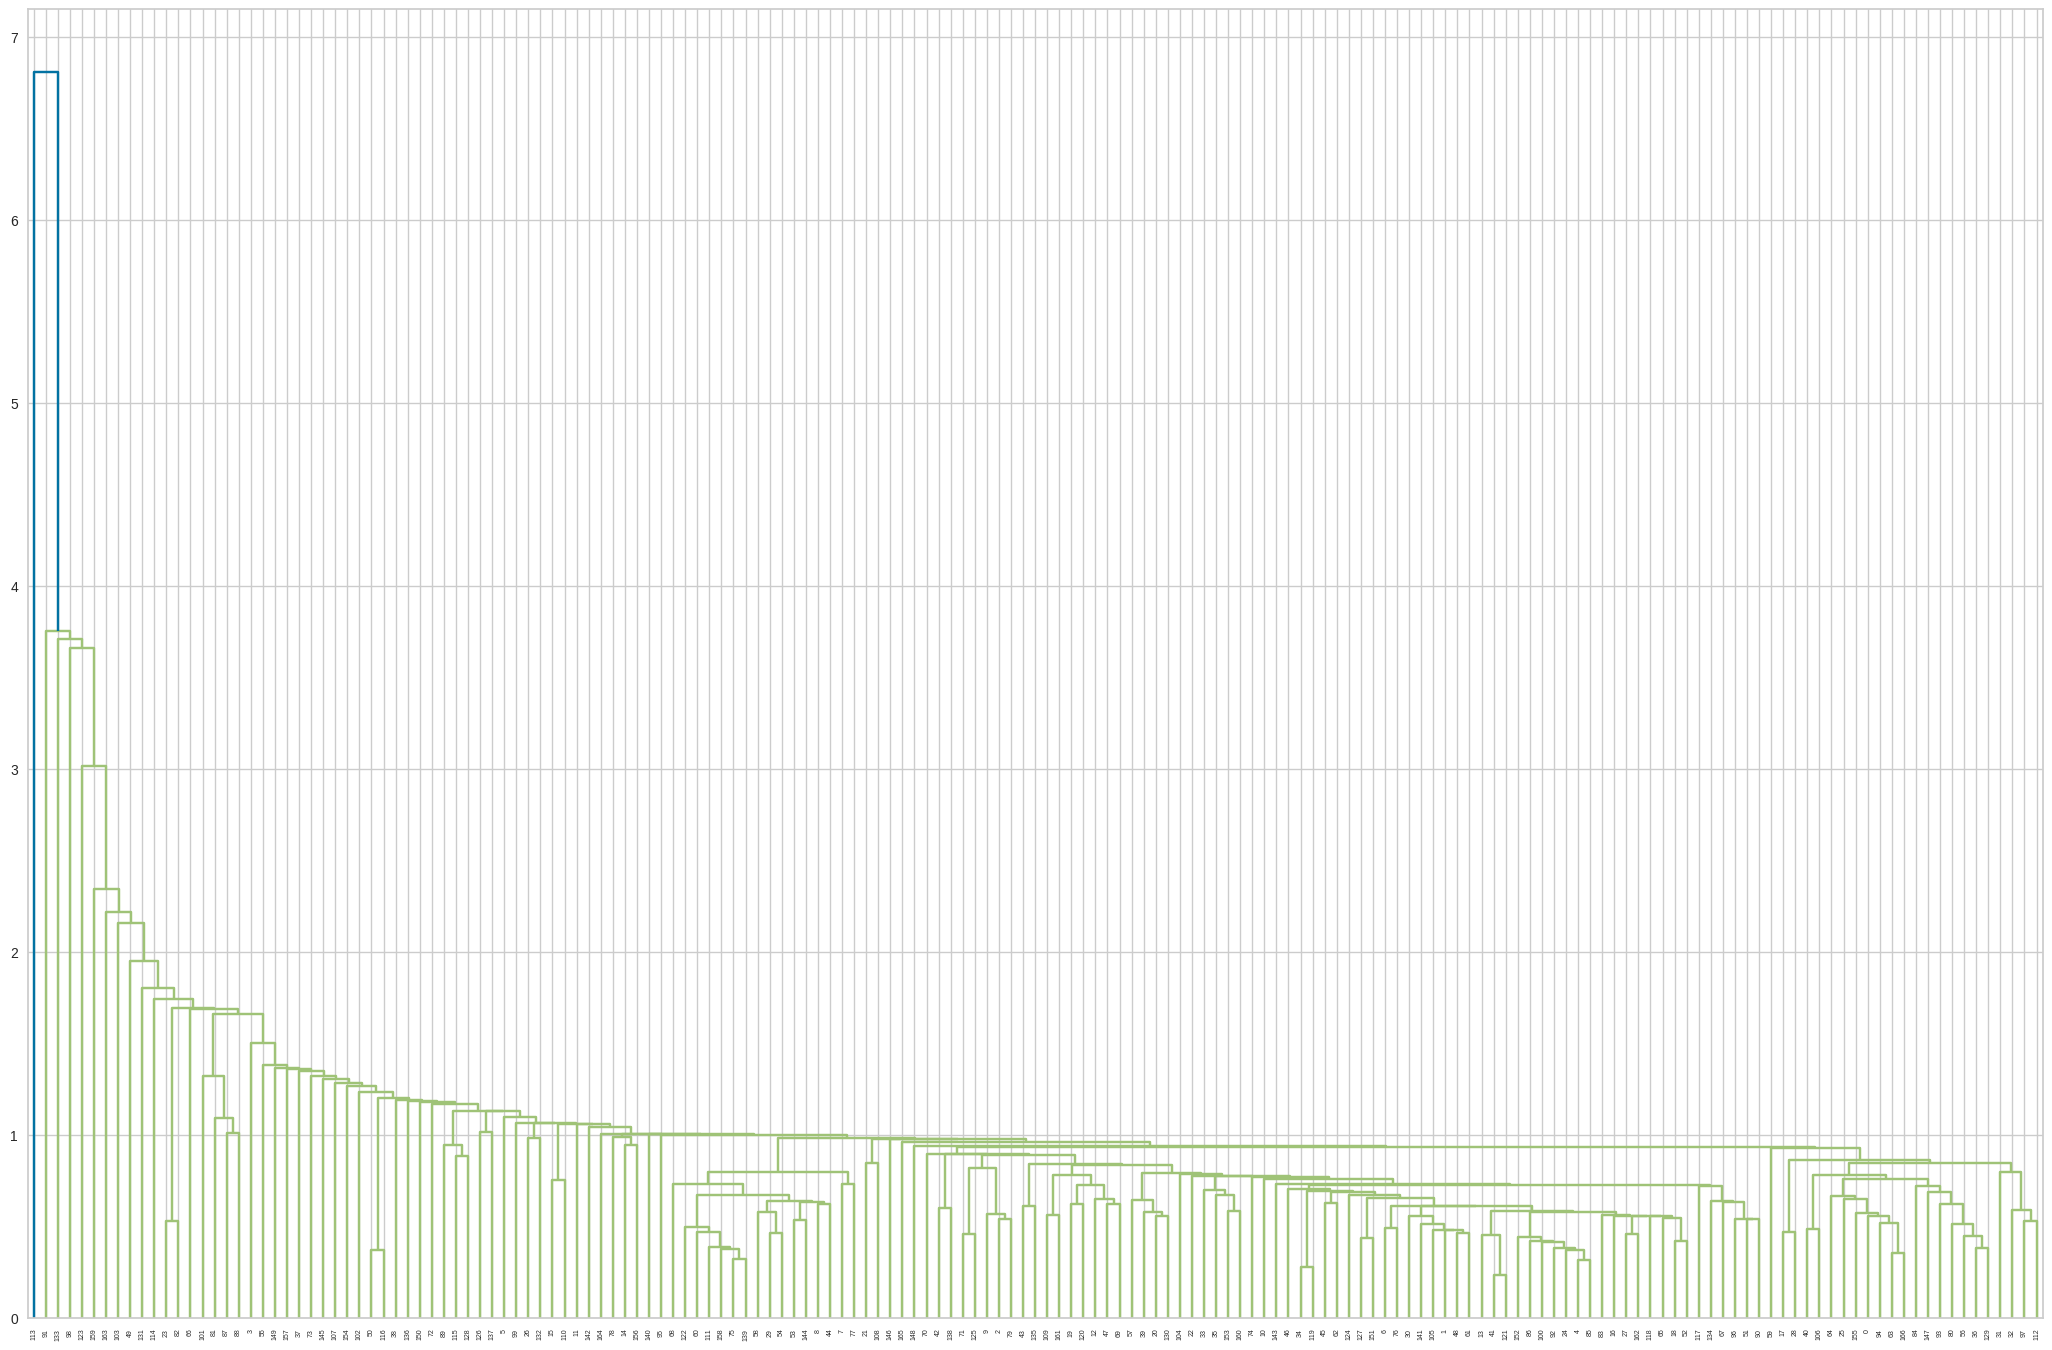

In [47]:
# code here
from scipy.cluster import hierarchy
plt.figure(figsize=(26, 17))
Z = hierarchy.linkage(data_pca)
dn = hierarchy.dendrogram(Z)

In [50]:
import plotly.figure_factory as ff
plt.figure(figsize=(600, 70))
fig = ff.create_dendrogram(data_pca)
fig.show()

<Figure size 60000x7000 with 0 Axes>

# DBSCAN Clustering

DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a popular density-based clustering algorithm in unsupervised machine learning. It is particularly useful for discovering clusters of arbitrary shapes in datasets with varying levels of data density. DBSCAN is known for its ability to handle noise and outliers effectively.

As always, You can find additional information about how DBSCAN clustering works in the following article on Analytics Vidhya:

[How DBSCAN Clustering Works](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%20is%20a%20density%2Dbased,points%20into%20a%20single%20cluster.)

This article provides a detailed explanation of DBSCAN, including its underlying concepts, the role of epsilon (ε) and minimum points (MinPts), and practical examples of how to use DBSCAN for clustering. It's a valuable resource for gaining a deeper understanding of the algorithm with Wikipedia as the side resource.

**2 Dimensional Visualization**

In [36]:
# Perform DBSCAN clustering with interactive widget
def dbscan_clustering(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data_pca) # code here

    # plot it
    plt.figure(figsize = (8,6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
    plt.show()

interact(dbscan_clustering, eps=(1,9 , 1 ), min_samples=(1,17 , 1 ))  # enter values here

interactive(children=(IntSlider(value=5, description='eps', max=9, min=1), IntSlider(value=9, description='min…

<function __main__.dbscan_clustering(eps, min_samples)>

**3 Dimensional Visualization**

In [40]:
# Perform DBSCAN clustering with interactive widget
def dbscan_3d_clustering(eps, min_samples):
    # write the function yourselves here
    dbscan_3d = DBSCAN(eps=eps, min_samples = min_samples)
    dbscan_3d_label = dbscan_3d.fit_predict(data_pca)

    fig = plt.figure(figsize = (6,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=dbscan_3d_label, cmap='gist_rainbow', edgecolors='k')
    plt.show()

interact(dbscan_3d_clustering, eps=(1 ,6 , 1), min_samples=(1, 15,1 ))

interactive(children=(IntSlider(value=3, description='eps', max=6, min=1), IntSlider(value=8, description='min…

<function __main__.dbscan_3d_clustering(eps, min_samples)>

# Mean Shift Clustering

It is a density-based clustering algorithm used in unsupervised machine learning and data analysis. Similar to DBSCAN, Mean Shift is capable of discovering clusters with arbitrary shapes and sizes in a dataset. It is particularly useful for applications where the number of clusters is not known in advance and when clusters have varying densities.

For more hands-on information about the Mean Shift clustering algorithm, you can refer to this tutorial on Analytics India Magazine:

[Hands-On Tutorial on Mean Shift Clustering Algorithm](https://analyticsindiamag.com/hands-on-tutorial-on-mean-shift-clustering-algorithm/)

This tutorial provides practical insights into how to implement and use Mean Shift clustering, making it a valuable resource for those looking to apply this clustering technique to real-world data analysis and machine learning tasks especially in the sector of Image Segmentation.

**2 Dimensional Visualization**

In [51]:
# Perform Mean Shift clustering with interactive widget
def meanshift_clustering(n_band):
    mean_shift = MeanShift(bandwidth=n_band)
    mean_shift_labels =  mean_shift.fit_predict(data_pca)# code here

    #plot here
    plt.figure(figsize = (8,6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=mean_shift_labels, cmap='hsv', edgecolors='k')
    plt.show()

interact(meanshift_clustering, n_band=(1,9 ,1 )) # enter here

interactive(children=(IntSlider(value=5, description='n_band', max=9, min=1), Output()), _dom_classes=('widget…

<function __main__.meanshift_clustering(n_band)>

***Congratulations! You have explored various clustering algorithms. Each algorithm has its own advantages and use cases. Remember, choosing the right algorithm and the right number of clusters is crucial. Feel free to experiment with different datasets and parameters to gain a better understanding.***

# **Bonus: To be done only if you have completed the above tasks.**

In this task, we covered clustering and Dimensionality reduction. But still, one aspect of Unsupervised Learning is left to be covered- **Association rules**. Reseach about this topic and mention the different algos that exist.

 Also, look into the functioning of **Spectral Clustering algorithm** and mention it here :)

 The best reseach will be edited and featured on the Synapse Instagram page!!

# **End of Task**

> ©DJS Synapse 2024 - 2025